In [13]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets

### Cargar los datos

In [14]:
TRAIN_DATASET_PATH = './data/titanic/train.csv'
TEST_DATASET_PATH = './data/titanic/test.csv'
train_df = pd.read_csv(TRAIN_DATASET_PATH).fillna(0)
test_df = pd.read_csv(TEST_DATASET_PATH).fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Convertimos las caracteristicas categoricas a numericas, usando one-hot-encoding

In [17]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].cat.codes
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


Separamos los datasets, y filtramos las categorias que vamos a usar

In [19]:
features = ['Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch']
X_train, y_train = train_df[features].values, train_df['Survived'].values
X_test   = test_df[features].values

In [21]:
X_train[:10, :]

array([[ 1.    , 22.    ,  3.    ,  7.25  ,  1.    ,  0.    ],
       [ 0.    , 38.    ,  1.    , 71.2833,  1.    ,  0.    ],
       [ 0.    , 26.    ,  3.    ,  7.925 ,  0.    ,  0.    ],
       [ 0.    , 35.    ,  1.    , 53.1   ,  1.    ,  0.    ],
       [ 1.    , 35.    ,  3.    ,  8.05  ,  0.    ,  0.    ],
       [ 1.    ,  0.    ,  3.    ,  8.4583,  0.    ,  0.    ],
       [ 1.    , 54.    ,  1.    , 51.8625,  0.    ,  0.    ],
       [ 1.    ,  2.    ,  3.    , 21.075 ,  3.    ,  1.    ],
       [ 0.    , 27.    ,  3.    , 11.1333,  0.    ,  2.    ],
       [ 0.    , 14.    ,  2.    , 30.0708,  1.    ,  0.    ]])

In [22]:
y_train[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [24]:
list(zip(features,clf.feature_importances_))

[('Sex', 0.3093351886283387),
 ('Age', 0.2122580609819448),
 ('Pclass', 0.0823219382051216),
 ('Fare', 0.3120727550902323),
 ('SibSp', 0.037117698470108124),
 ('Parch', 0.04689435862425447)]

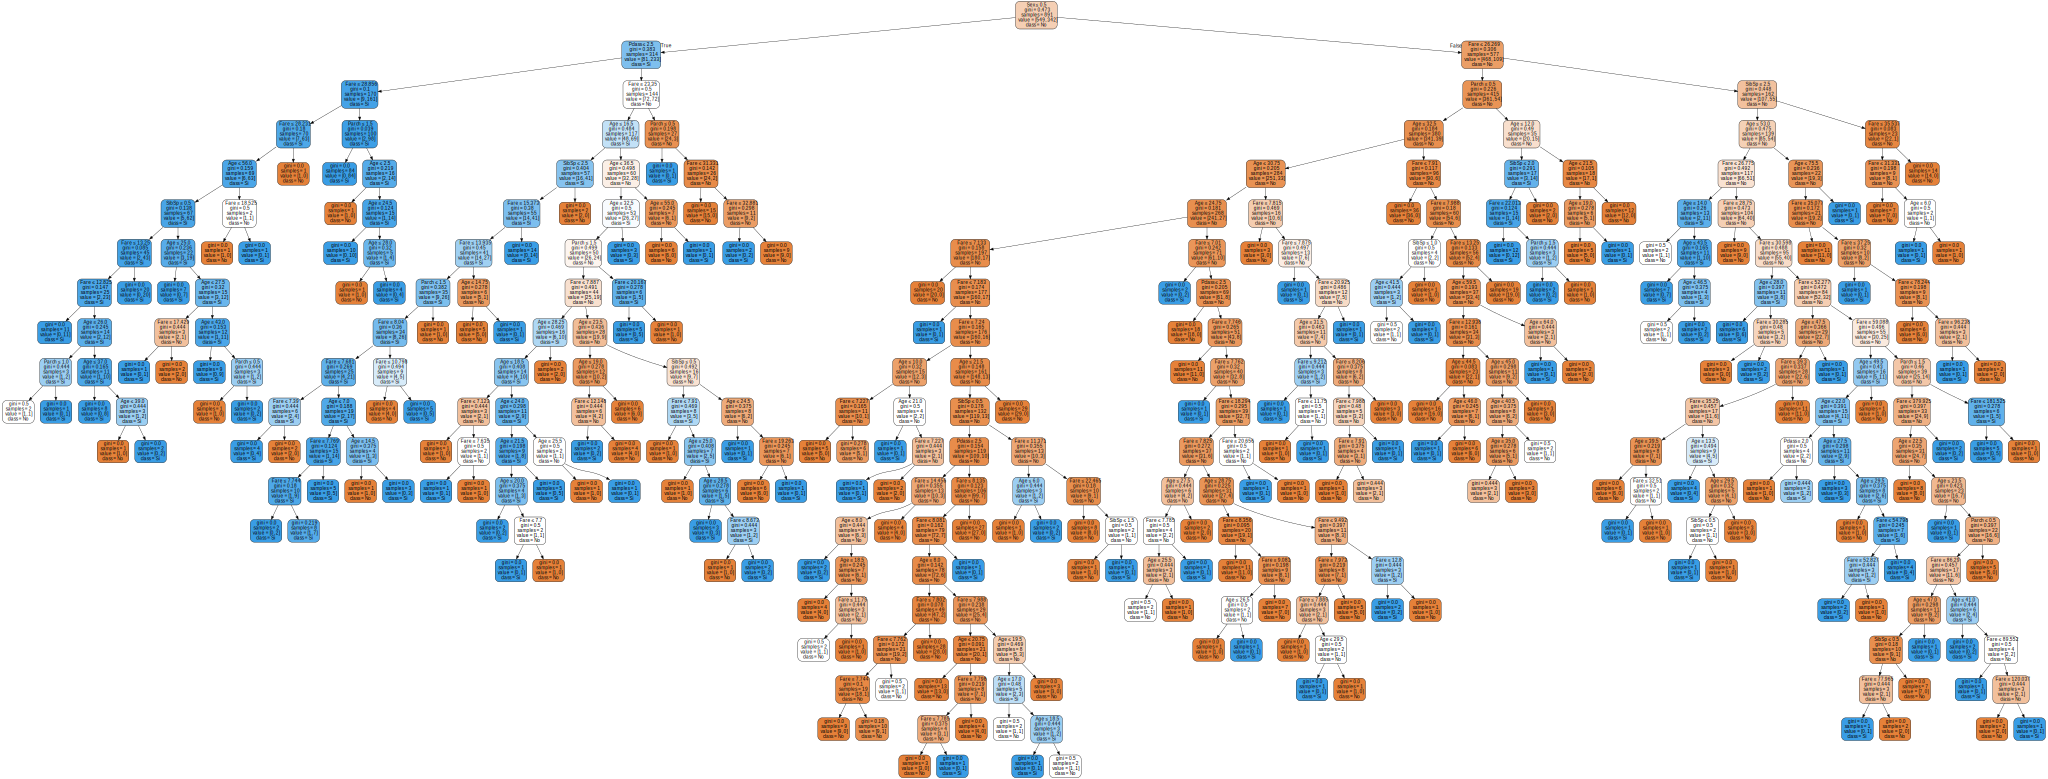

In [26]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=['No', 'Si'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('titanic')
graph 